# Section 0 - Imports and functions

In [4]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
import re
def plot_pareto_front(day_to_plot, folder, nameSuffix):
    path_image_folder = os.path.join(folder,f"Day{day_to_plot}\\LocalSearch\\")
    path_image = os.path.join(path_image_folder,f"PFrontCombined_{re.sub(r"(Day\d+)", f"Day{day_to_plot}", nameSuffix)}.png")
    
    img = mpimg.imread(path_image)
    
    plt.imshow(img)
    plt.show()

def plot_pareto_front_dichotromic(day_to_plot, folder, nameSuffix):
    path_image_folder = os.path.join(folder,f"Day{day_to_plot}\\Dichotromic\\")
    path_image = os.path.join(path_image_folder,f"PFront_{re.sub(r"(Day\d+)", f"Day{day_to_plot}", nameSuffix)}.png")
    
    img = mpimg.imread(path_image)
    
    plt.imshow(img)
    plt.show()

## Section 1 - Pareto local search for load shifting (PALSS)

In [ ]:
import Run_Simulations_Combined
Run_Simulations_Combined.useLocalSearch = True
Run_Simulations_Combined.useCentralizedOptimization = True #only w/o RL
Run_Simulations_Combined.useConventionalControl = False #only w/o RL
Run_Simulations_Combined.useDichotomicMethodCentralized_Cost_Peak = False


## change days
# change days: default is [9,11], possible days (with full pareto front comparision) are [3,9,11,15,23,28,37,39,45,52,55,65,72,80,81,292,294,298,303,310,314,315,319,328,332,339,346,350,352,361]
days = [9,11] #(default)

In [3]:
%%capture
#run, expected duration: 
folderPath, nameAppendix = Run_Simulations_Combined.run_simulations(withRL=False, days_for_simulation = days)


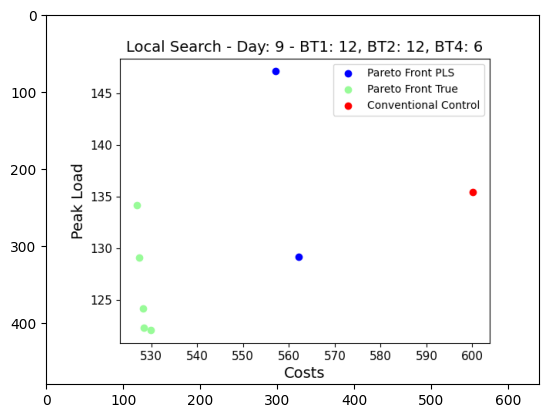

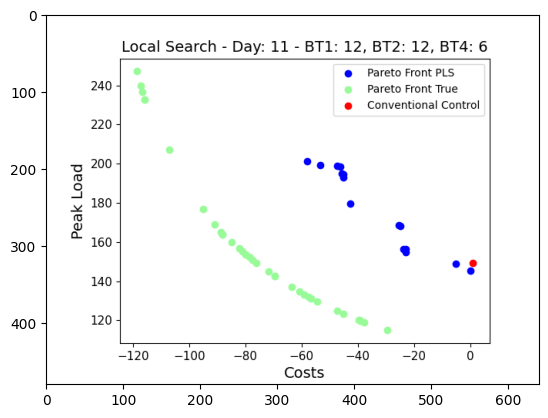

In [6]:
# Plot
# The strings should look like:
    ### folderPath, nameAppendix = f"data\\Results\\Instance Base\\03_07_2024_Time_14_49_50_Base_Min10_BTCombined_30","Local Search_Day11_BT1_12_BT2_12_BT4_6"

# Alternatively, you can load example_data with the following line:
# folderPath, nameAppendix = f"example_data\\example_results\\03_07_2024_Time_14_49_50_Base_Min10_BTCombined_30","Local Search_Day11_BT1_12_BT2_12_BT4_6"
day_to_plot = "9"#days[0]
plot_pareto_front(day_to_plot, folderPath, nameAppendix)
day_to_plot = "11"#days[1]
plot_pareto_front(day_to_plot, folderPath, nameAppendix)


## Section 2 - Reinforcement learning assisted pareto local search (RELAPALSS)

You can either train the shif operators (takes up to a few hours) or use already trained models.

# Section 2.1a - Train shift operators

In [5]:
# days for training (defined within function), shouldn't be used for testing:     days_for_training =  [18, 31, 32, 49, 74, 80, 290, 302, 305, 331, 349, 345]
import RL_Training_One_Shift_Operator
### duration for one training: ca. 3 hours - pretrained models can be used
### train cost shift operator
# dir_price_shift_operator_model = RL_Training_One_Shift_Operator.ml_train_one_shift_operator(isPriceOperator = True)
### train peak shift opertor
# dir_peak_shift_operator_model = RL_Training_One_Shift_Operator.ml_train_one_shift_operator(isPriceOperator = False)

import Run_Simulations_Combined


# Section 2.1b Use already trained operators

In [8]:
###
import Run_Simulations_Combined

# only execute the following line for the base example;
# some already trained models or new trained models will be in the folder 'data/Reinforcement_Learning/RL_Trained_Models/' (default value of DIL_RL_Models)
Run_Simulations_Combined.config.DIR_RL_MODELS = "example_data/example_models/" 

# Select models
dir_price_shift_operator_model = "RL2_Days12_SolSol10_SolIt10_ItDay2_ResStateTrue_StateTimeSlots5_ShiftActions20_PPO_RC/trained_PPO_model"
dir_peak_shift_operator_model = "RL3_Days12_SolSol10_SolIt10_ItDay2_ResStateTrue_StateTimeSlots5_ShiftActions15_PPO_qf/trained_PPO_model"

Section 2.2 - Reinforcement learning assisted pareto local search (RELAPALSS)

In [9]:
# Set up model names
Run_Simulations_Combined.dir_price_shift_model = dir_price_shift_operator_model.split("/")[-1]+"/trained_PPO_model"
Run_Simulations_Combined.dir_peak_shift_model = dir_peak_shift_operator_model.split("/")[-1]+"/trained_PPO_model"

In [10]:
Run_Simulations_Combined.useLocalSearch = True
Run_Simulations_Combined.useDichotomicMethodCentralized_Cost_Peak = False

## change days
# change days: default is [9,11], possible days (with full pareto front comparision) are [3,9,11,15,23,28,37,39,45,52,55,65,72,80,81,292,294,298,303,310,314,315,319,328,332,339,346,350,352,361]
days = [9,11] #(default)
#run, expected duration: 

In [11]:
%%capture
#run, expected duration: 
folderPath, nameAppendix = Run_Simulations_Combined.run_simulations(withRL=True, days_for_simulation = days)

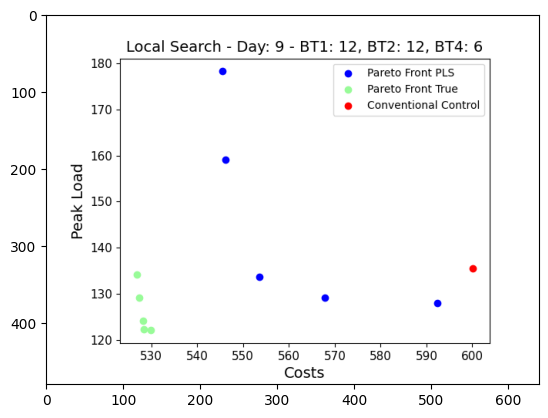

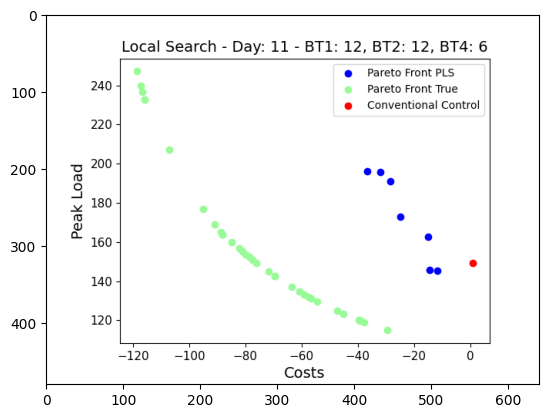

In [13]:
# Plot
# The strings should look like:
    ### folderPath, nameAppendix = f"data\\Results\\Instance Base\\03_07_2024_Time_15_15_42_RL2_RL3_Min10_BTCombined_30","Local Search_Day11_BT1_12_BT2_12_BT4_6"

# Alternatively, you can load example_data with the following line:
#folderPath, nameAppendix = f"example_data\\example_results\\03_07_2024_Time_15_15_42_RL2_RL3_Min10_BTCombined_30","Local Search_Day11_BT1_12_BT2_12_BT4_6"
day_to_plot = "9"#days[0]
plot_pareto_front(day_to_plot, folderPath, nameAppendix)
day_to_plot = "11"#days[1]
plot_pareto_front(day_to_plot, folderPath, nameAppendix)

In [11]:
## Section 3 - Dichotomic Optimization

In [14]:
import Run_Simulations_Combined
Run_Simulations_Combined.useLocalSearch = False
Run_Simulations_Combined.useCentralizedOptimization = True #only w/o RL
Run_Simulations_Combined.useConventionalControl = False #only w/o RL
Run_Simulations_Combined.useDichotomicMethodCentralized_Cost_Peak = True

## change days
# change days: default is [9,11], possible days (with full pareto front comparision) are [3,9,11,15,23,28,37,39,45,52,55,65,72,80,81,292,294,298,303,310,314,315,319,328,332,339,346,350,352,361]
days = [9,11]#[9,11] #(default)
#run, expected duration: 

In [ ]:
%%capture
#run, expected duration: 
folderPath, nameAppendix = Run_Simulations_Combined.run_simulations(withRL=False, days_for_simulation = days)

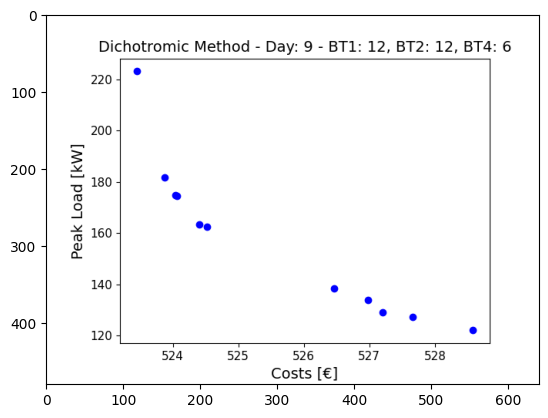

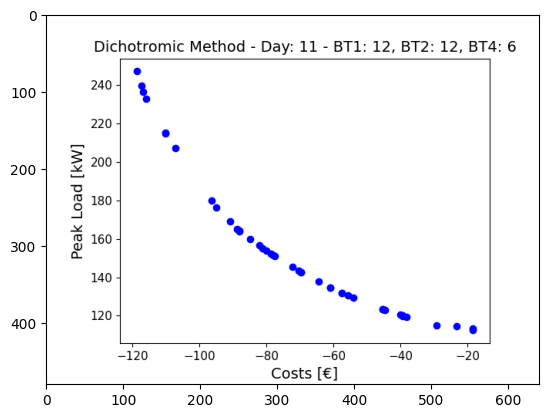

In [5]:
# Plot
# The strings should look like:
    ### folderPath, nameAppendix = f"data\\Results\\Instance Base\\03_07_2024_Time_12_22_20_Base_Min10_BTCombined_30","DC_Day9_BT1_12_BT2_12_BT4_6"

# Alternatively, you can load example_data with the following line:
#folderPath, nameAppendix = f"example_data\\example_results\\03_07_2024_Time_12_22_20_Base_Min10_BTCombined_30","DC_Day9_BT1_12_BT2_12_BT4_6"
%matplotlib inline
day_to_plot = "9"#days[0]
plot_pareto_front_dichotromic(day_to_plot, folderPath, nameAppendix)
%matplotlib inline
day_to_plot = "11"#days[1]
plot_pareto_front_dichotromic(day_to_plot, folderPath, nameAppendix)
